# Pyber Ride Sharing
----

### Analysis
* Over 60% of all rides and total fare value come from urban riders.
* Rural riders tend to take significantly higher cost, albeit fewer, trips than urban or suburban riders.
* While comprising about 35% of all rides and fares, suburban and rural cities afford only 22% of Pyber's total driver population. There may be a strategic opportunity here to boost driver counts in these regions to enhance market share.

In [14]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "/Users/vanjoisscott/Desktop/BootCamp2/Pyber/data/city_data.csv"
ride_data_to_load = "/Users/vanjoisscott/Desktop/BootCamp2/Pyber/data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


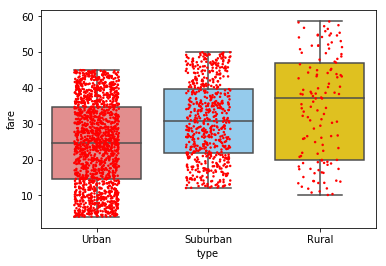

In [15]:
import seaborn as sns
# Use a color palette
my_pal = {"Rural": "gold", "Urban": "lightcoral", "Suburban":"lightskyblue"}

sns.boxplot( x=city_ride_data["type"], y=city_ride_data["fare"], palette=my_pal)
sns.stripplot(x='type', y='fare', data=city_ride_data, color="red", jitter=0.2, size=2.5)


plt.savefig("/Users/vanjoisscott/Desktop/BootCamp2/Pyber/fig1.png")

## Bubble Plot of Ride Sharing Data

In [16]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = city_ride_data[city_ride_data["type"] == "Urban"]
suburban_cities = city_ride_data[city_ride_data["type"] == "Suburban"]
rural_cities = city_ride_data[city_ride_data["type"] == "Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

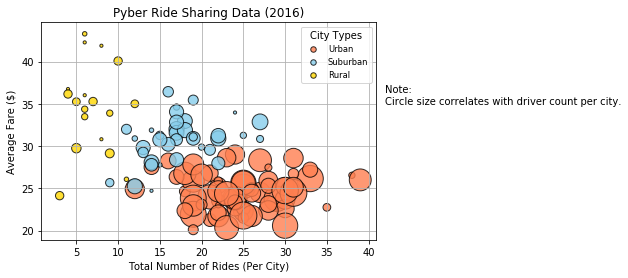

In [17]:
# Build the scatter plots for each city types
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("/Users/vanjoisscott/Desktop/BootCamp2/Pyber/fig2.png")
# Show plot
plt.show()

## Total Fares by City Type

FileNotFoundError: [Errno 2] No such file or directory: 'analysis/Fig2.png'

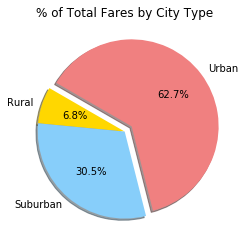

In [23]:
# Calculate Type Percents
type_percents = 100 * city_ride_data.groupby(["type"]).sum()["fare"] / city_ride_data["fare"].sum()

# Build Pie Chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("analysis/Fig2.png")

# Show Figure
plt.show()

In [28]:
from matplotlib_venn import venn3
venn3(type_percents,set_labels=["Rural", "Suburban", "Urban"])
c=venn3_circles["gold", "lightskyblue", "lightcoral"]
plt.show()

TypeError: unsupported operand type(s) for |: 'float' and 'float'

## Total Rides by City Type

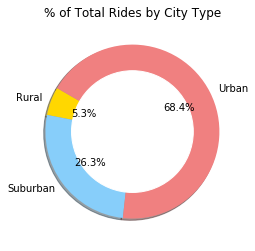

In [18]:
# Calculate Ride Percents
ride_percents = 100 * city_ride_data.groupby(["type"]).count()["ride_id"] / city_ride_data["ride_id"].count()

# Build Pie Chart
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.0], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.title("% of Total Rides by City Type")

# # Save Figure
# plt.savefig("analysis/Fig3.png")

# Show Figure
plt.show()

## Total Drivers by City Type

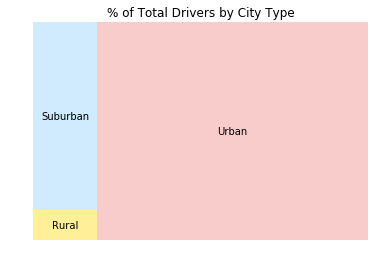

In [22]:
import squarify

# Calculate Driver Percents
driver_percents = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()

# Change color
squarify.plot(driver_percents, label=["Rural", "Suburban", "Urban"], color=["gold","lightskyblue","lightcoral"], alpha=.4)
plt.axis('off')
plt.title("% of Total Drivers by City Type")
plt.show()



In [7]:
city_data["driver_count"].sum()

2973

In [8]:
city_data["driver_count"].sum()

2973

In [9]:
city_ride_data["driver_count"].sum()

68709

In [10]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
